#### implementation of unsupervised-Kmeans algorithm
Here I am going to apply K-means algorithm and going to evaluate the model with the help of silhoutte method

In [3]:
#loading all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from sklearn.cluster import KMeans
from pandas_profiling import ProfileReport
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#### loading the dataset from kaggle

In [5]:
df=pd.read_csv('Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Make the problem statement easier for understanding and visualization
to make the visualisation simpler, we are going to select only 2 features out of 5 as the data can't be visualized on 5 dimensions
Therefore, selected features are: Annual Income and Spending Score

In [7]:
X=df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### EDA in brief using Pandas Profiling

In [8]:
Report_EDA=ProfileReport(df)
Report_EDA.to_file('Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1st Algorithm: K-means Algorithm:
this algorithm involves two main steps:
1) finding the best value of K/number of centroid with the help of elbow method: we can draw a graph between WCSS and K to see where the K causes an abrupt change in the WCSS value.

2) using the K-means ++ parameter to ensure centroids get initialised afar to prevent them from getting intialised near to each other resulting in incorrect formation of clusters.

#### Using Elbow method to find the best value of K/number of clusters:
we will find the WCSS(within cluster sum of squares) for different K values
to find the optimal value of K

Text(0.5, 1.0, 'Elbow Method')

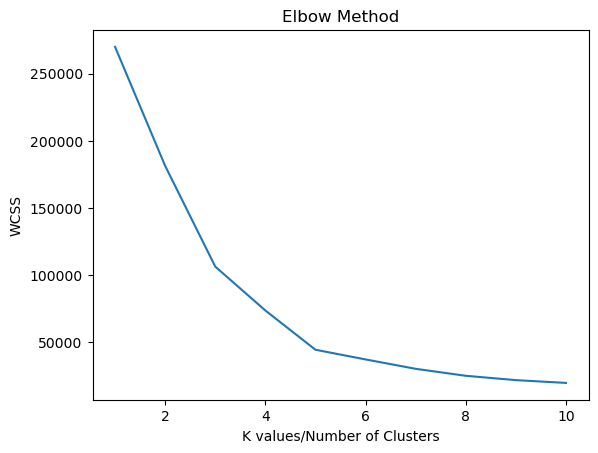

In [9]:
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)#the model is getting trained
    WCSS.append(kmeans.inertia_)# finding the WCSS

plt.plot(range(1,11),WCSS)
plt.xlabel('K values/Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

#### for K=5, an aburupt change in the WCSS value can be noticed in the above graph

In [10]:
# selecting the K value as 5 after the elbow method.
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(X)

In [11]:
y_kmeans # the cluster where each record belongs to

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [12]:
kmeans.cluster_centers_ #coordinates of the cluster

array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

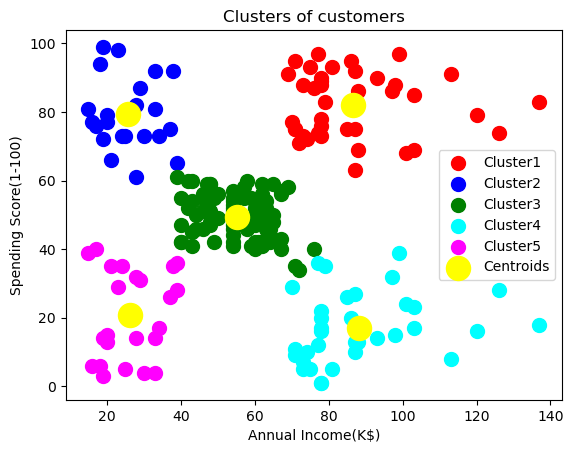

In [13]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

#### Validating the model: Silhoutte method: 
this is to see how is our cluster configuration. the value of the silhoutte score lies between -1 and +1.

for k value = 2, the Silhoutte score is 0.2968969162503008
for k value = 3, the Silhoutte score is 0.46761358158775435
for k value = 4, the Silhoutte score is 0.4931963109249047
for k value = 5, the Silhoutte score is 0.553931997444648
for k value = 6, the Silhoutte score is 0.53976103063432
for k value = 7, the Silhoutte score is 0.5314247434775297
for k value = 8, the Silhoutte score is 0.4575689106804838
for k value = 9, the Silhoutte score is 0.4553729779390266
for k value = 10, the Silhoutte score is 0.46101684512909263


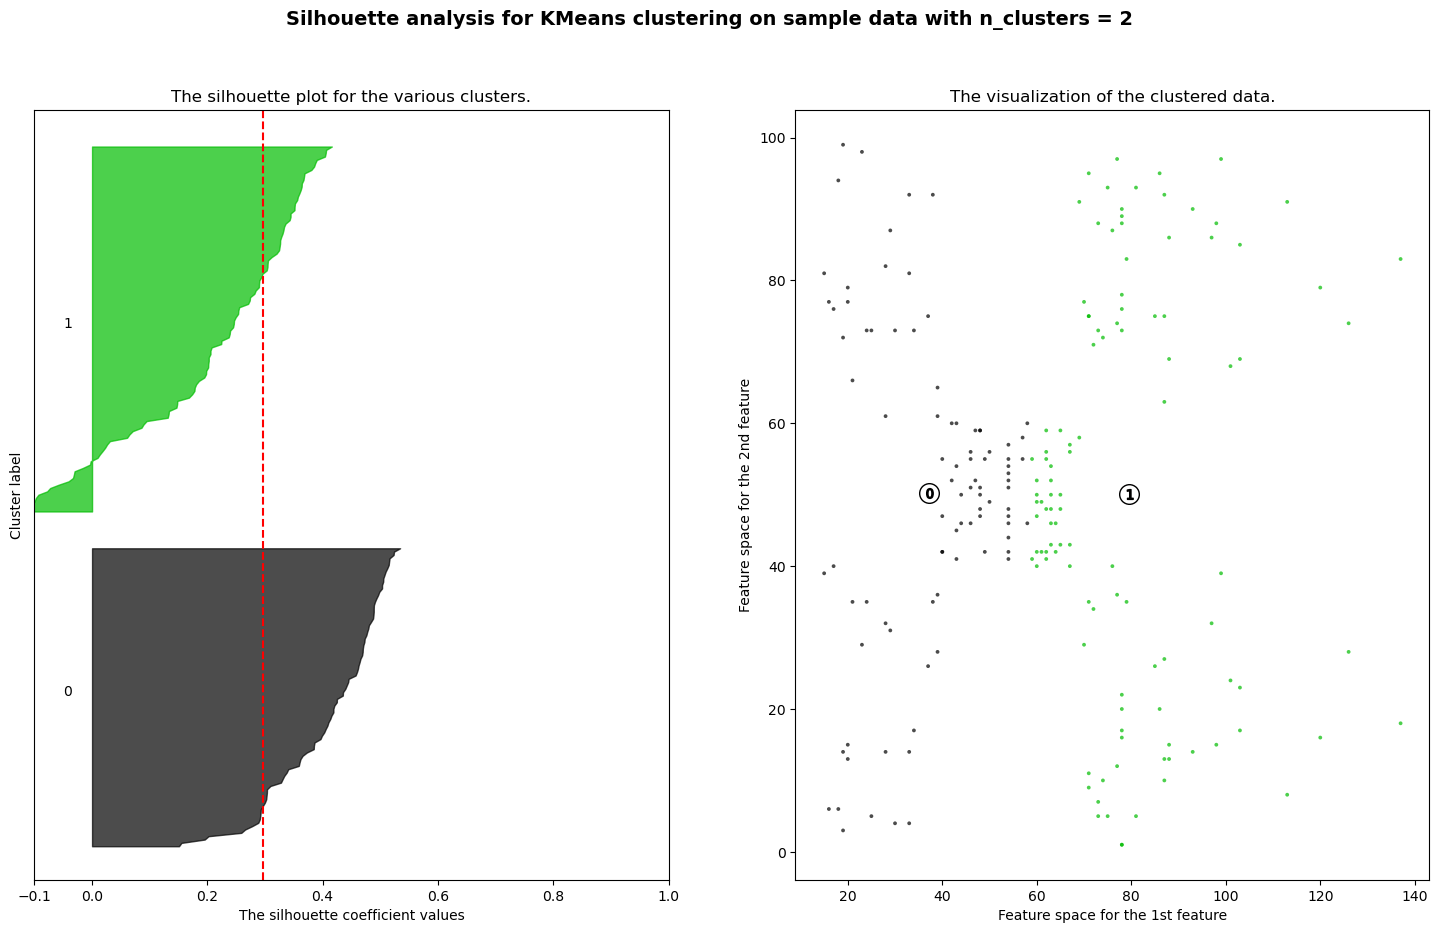

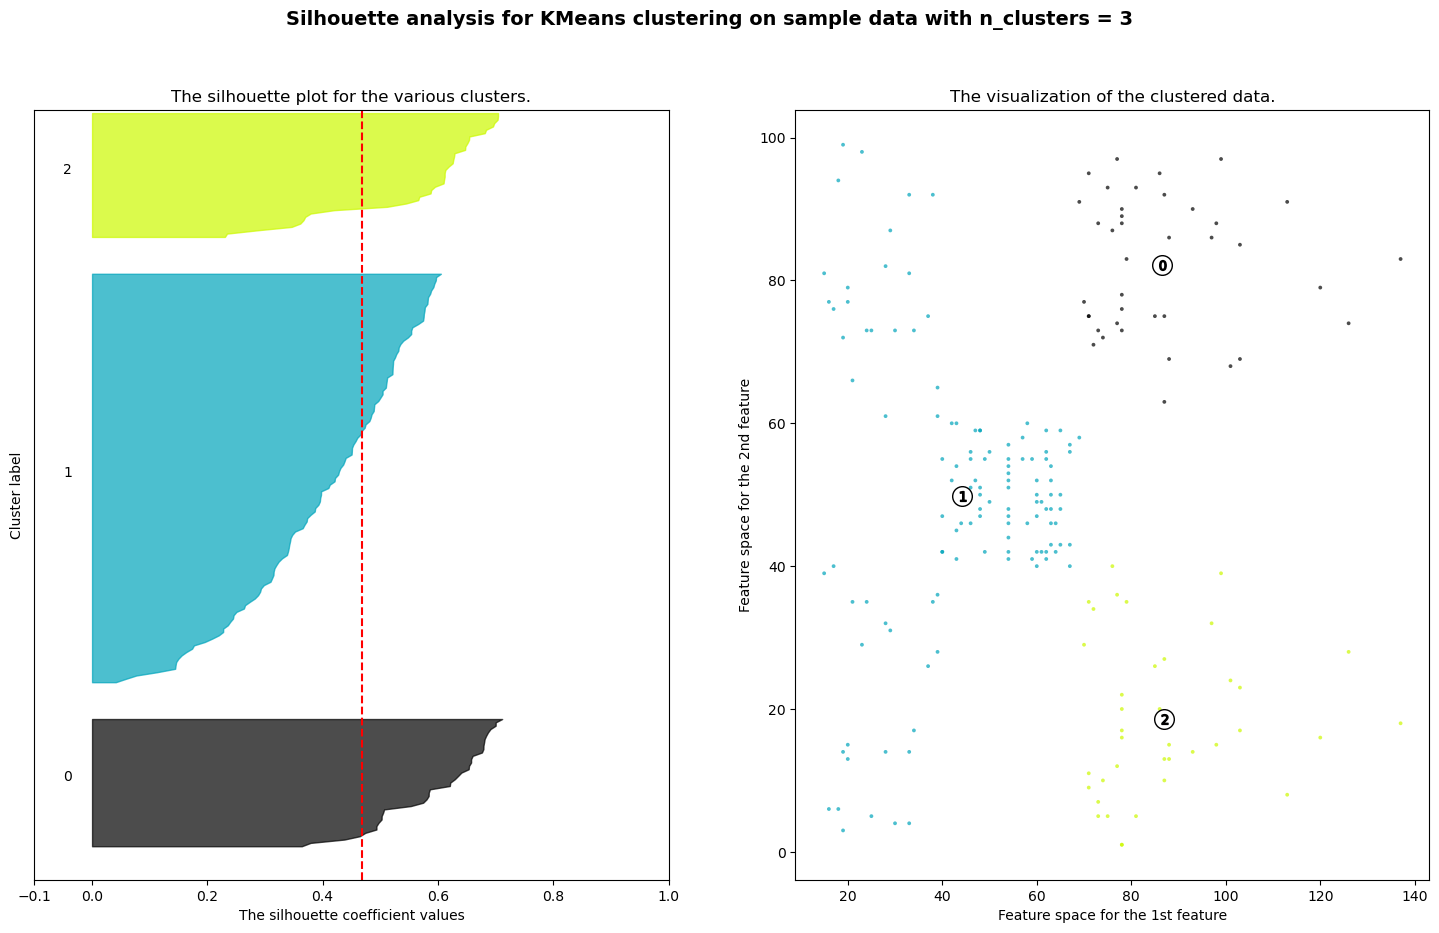

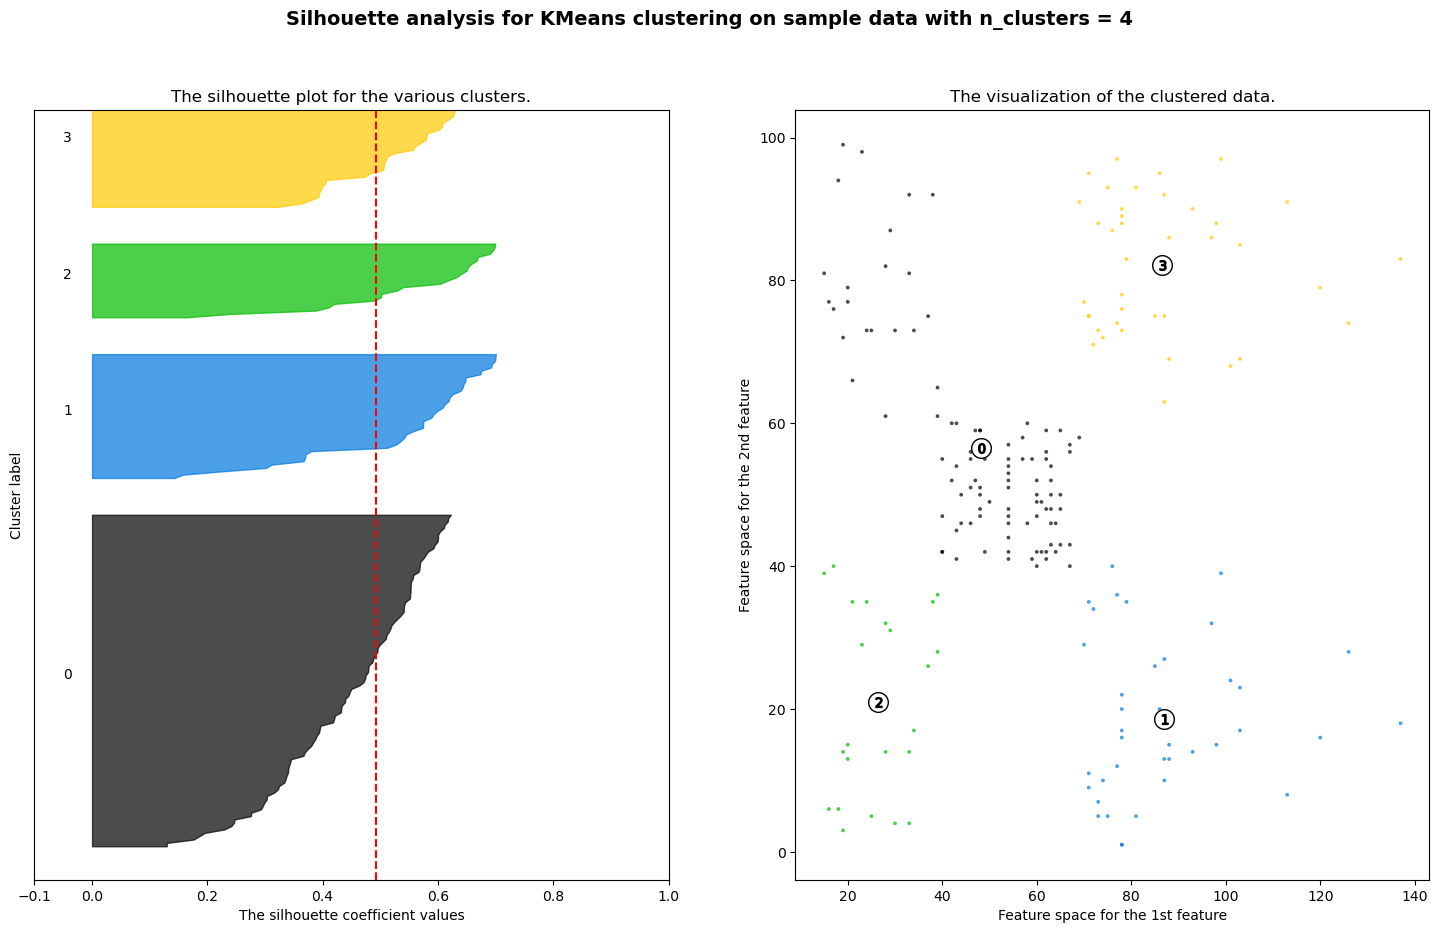

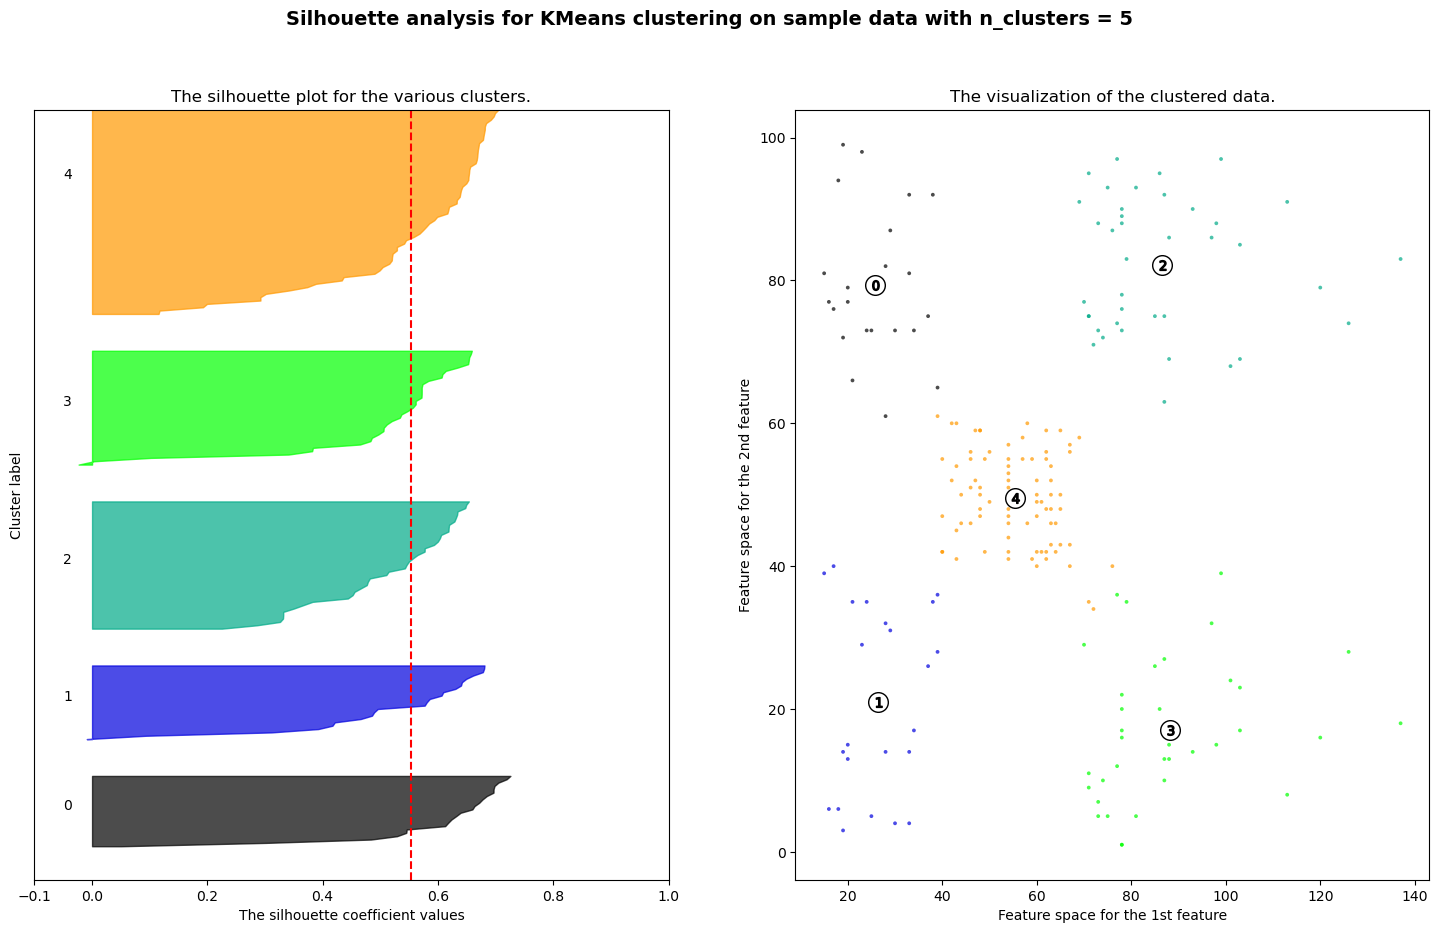

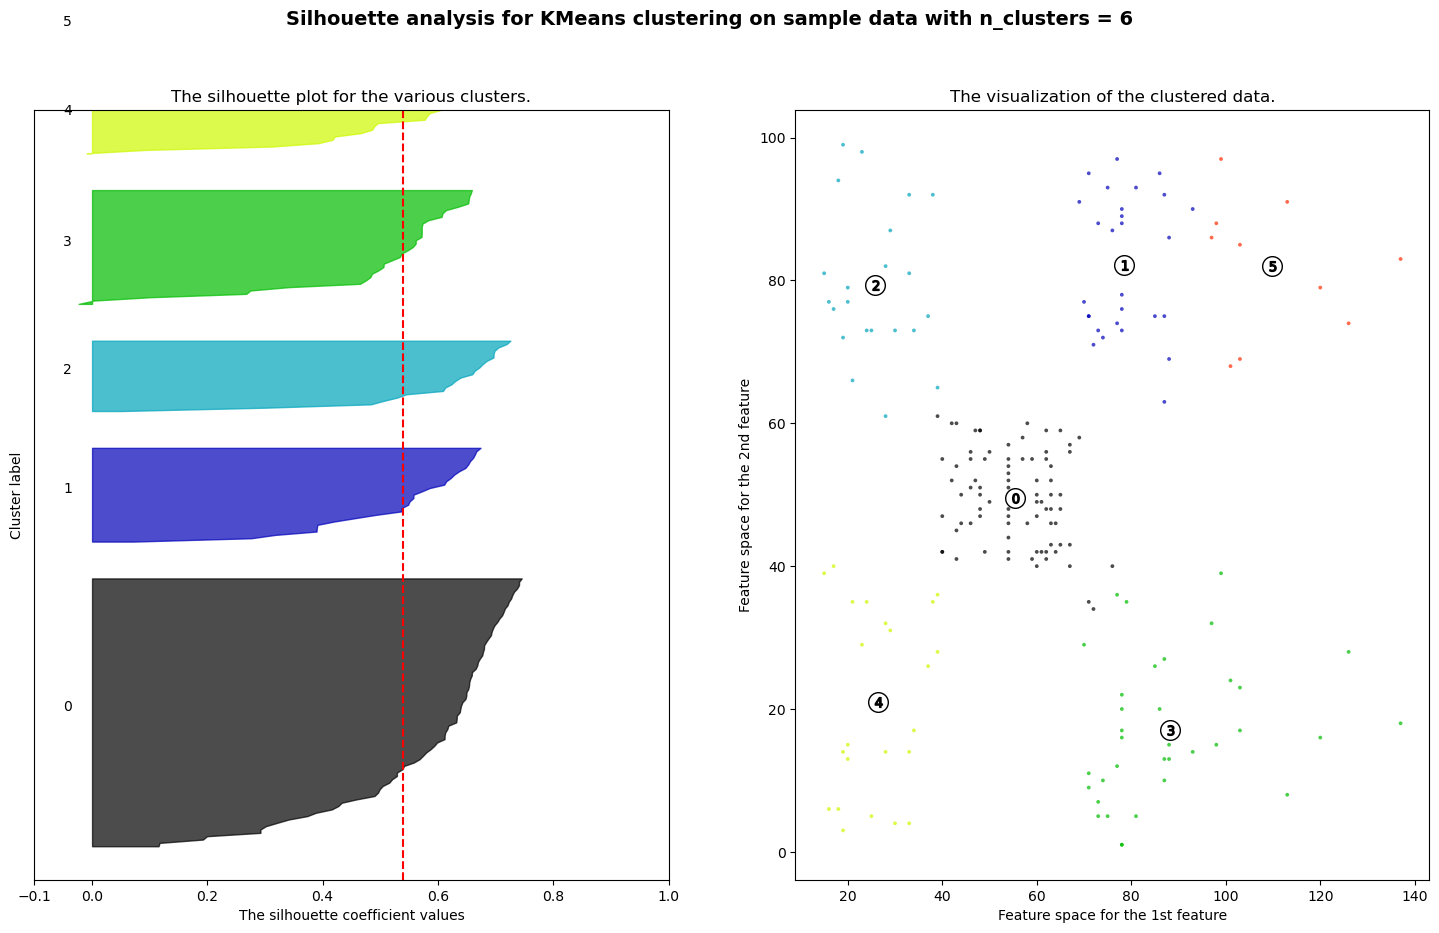

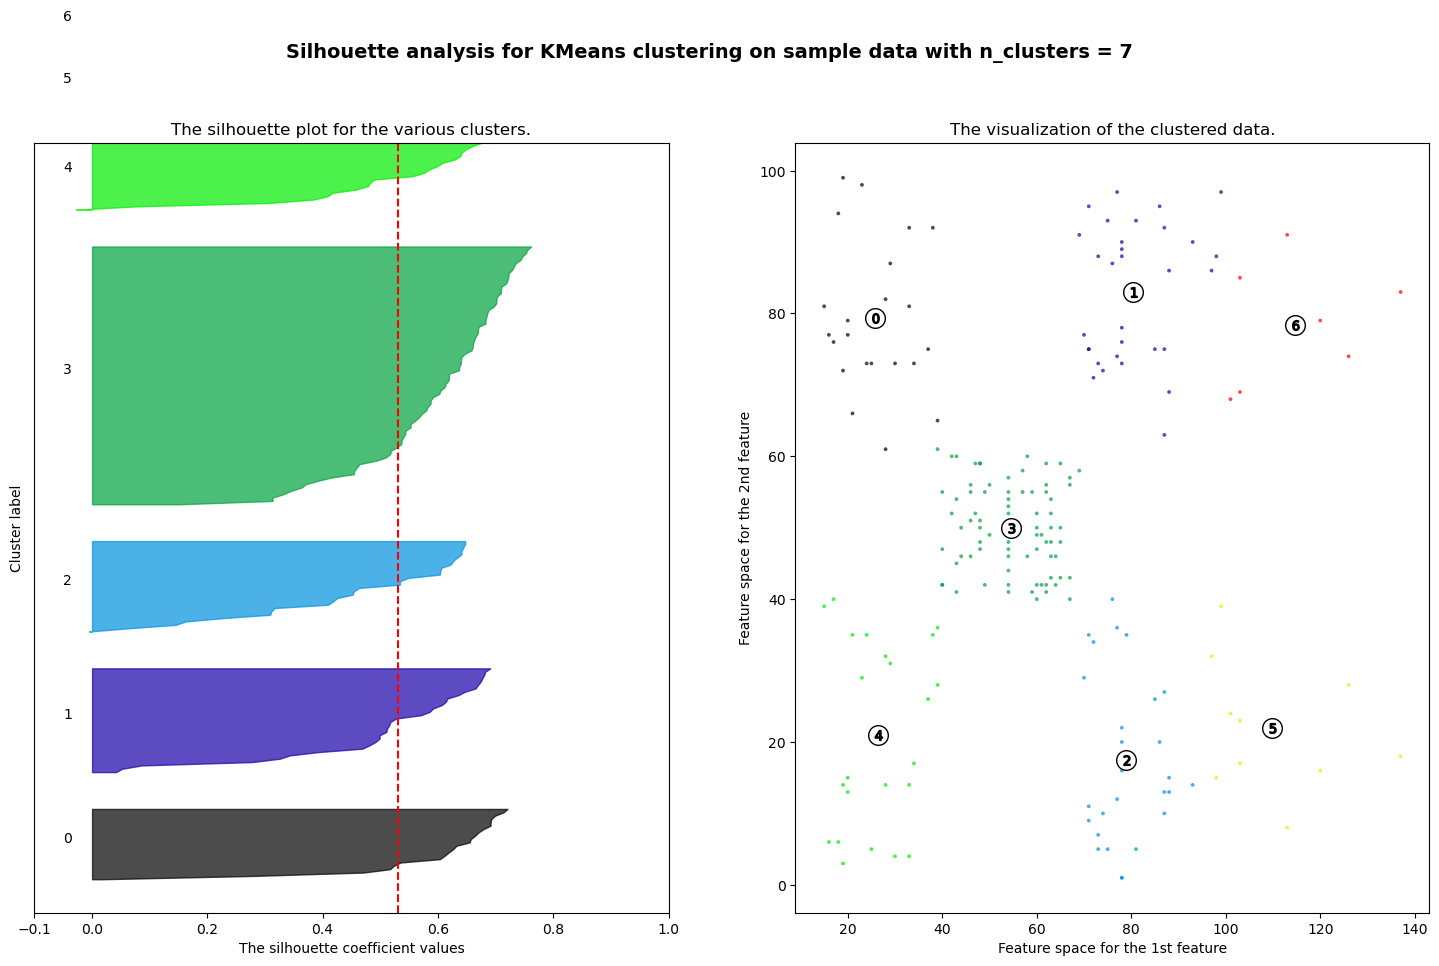

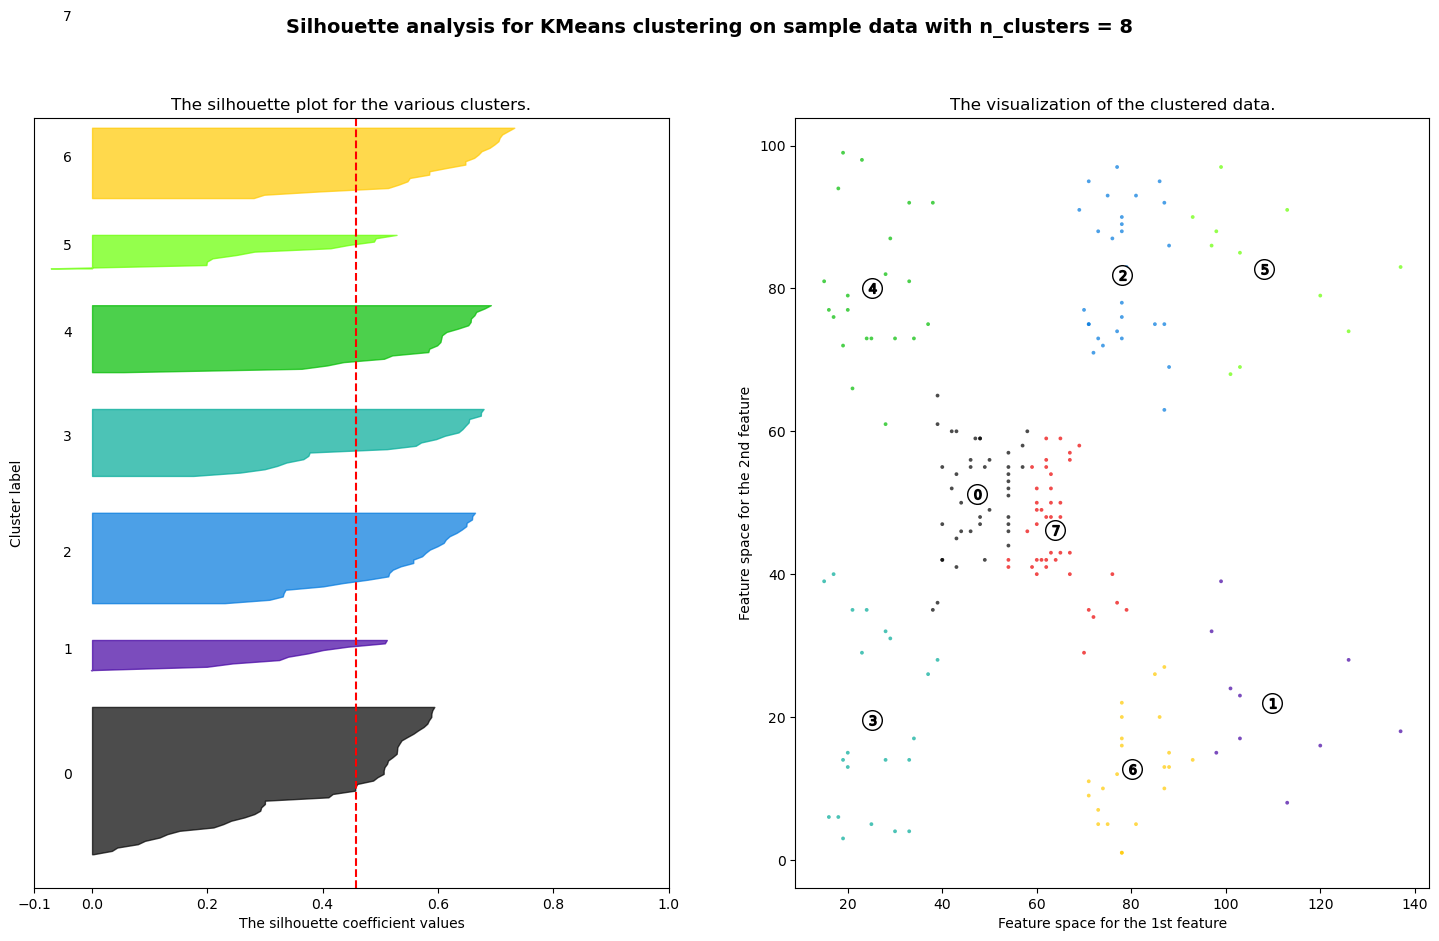

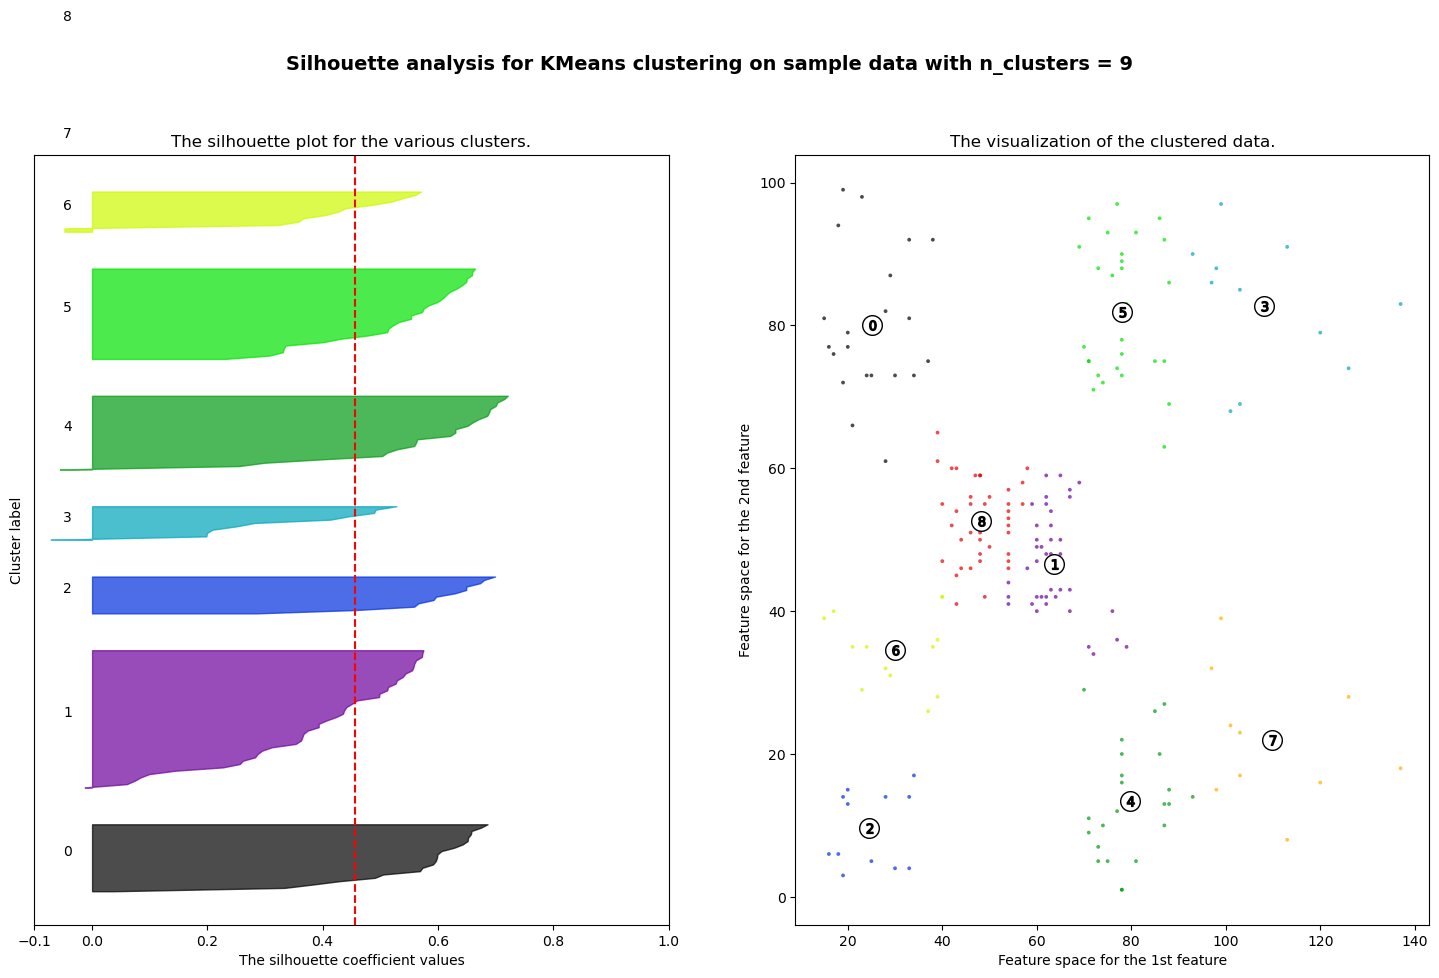

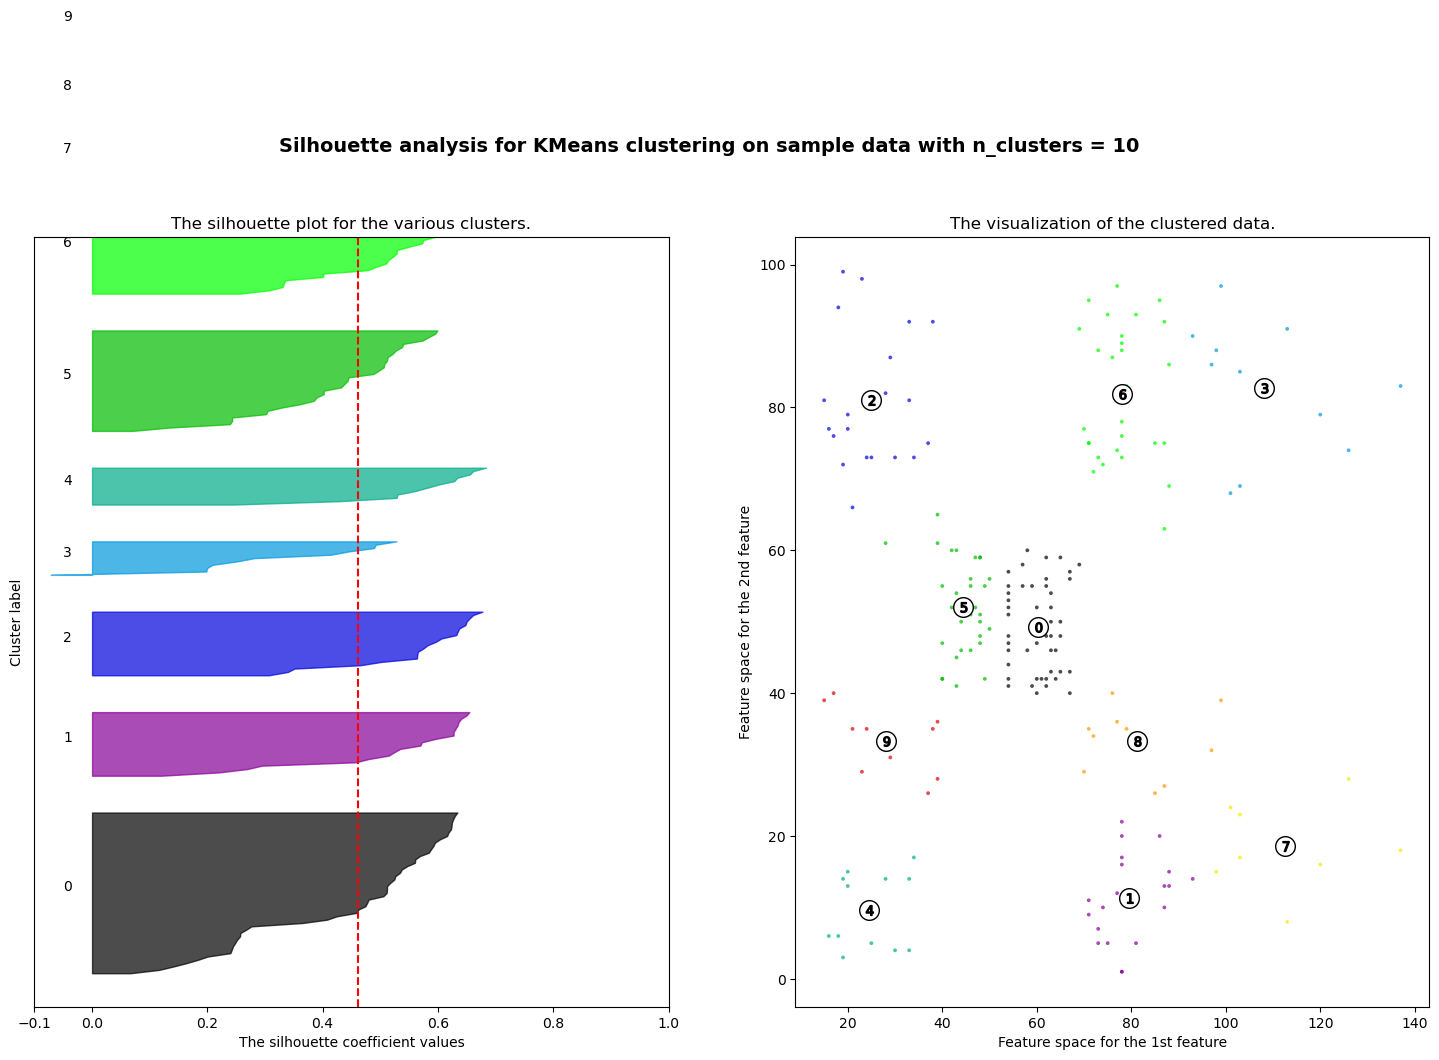

In [15]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    fig,(ax1,ax2)=plt.subplots(1,2) 
    # plotting a canvas with 1 row and 2 columns
    fig.set_size_inches(18,10) 
    # setting up the size of the plot
    ax1.set_xlim([-0.1,1]) 
    # setting up x limit of the 1st subplot: this is for silhoutte score
    ax1.set_ylim([0,len(X)+(2+1)*10]) 
    # setting up the y limit of the 2nd subplot
    kmeans=KMeans(n_clusters=n_clusters,init='k-means++')
    cluster_labels=kmeans.fit_predict(X)
    # this is to create clusters for different K values
    silhoutte_avg=silhouette_score(X,cluster_labels)
    # calculating Silhoutte score for the clustered data
    print(f'for k value = {n_clusters}, the Silhoutte score is {silhoutte_avg}')
    silhoutte_values=silhouette_samples(X,cluster_labels)
    # calculating all the silhoutte values/distance between points
    
    
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            silhoutte_values[cluster_labels == i]# getting points present within a cluster

        ith_cluster_silhouette_values.sort()# sorting the values
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhoutte_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
        